---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
energy = pd.read_excel('Energy Indicators.xls')
energy

,Unnamed: 0,Unnamed: 1,Environmental Indicators: Energy,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Last update: December 2015
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Choose a country from the following drop-down ...,NaN,NaN,Andorra
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
8,NaN,NaN,NaN,Petajoules,Gigajoules,%
9,NaN,NaN,Andorra,9,121,88.6957


In [3]:
energy = pd.read_excel('Energy Indicators.xls', header=7, skiprows=10, skip_footer=265-227)
energy

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321,10,78.669280
1,NaN,Albania,Albania,102,35,100.000000
2,NaN,Algeria,Algeria,1959,51,0.551010
3,NaN,American Samoa,American Samoa,...,...,0.641026
4,NaN,Andorra,Andorra,9,121,88.695650
5,NaN,Angola,Angola,642,27,70.909090
6,NaN,Anguilla,Anguilla,2,136,0.000000
7,NaN,Antigua and Barbuda,Antigua and Barbuda,8,84,0.000000
8,NaN,Argentina,Argentina,3378,79,24.064520
9,NaN,Armenia,Armenia,143,48,28.236060


In [4]:
energy = energy[['Unnamed: 1', 'Petajoules', 'Gigajoules', '%']]
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
5,Angola,642,27,70.909090
6,Anguilla,2,136,0.000000
7,Antigua and Barbuda,8,84,0.000000
8,Argentina,3378,79,24.064520
9,Armenia,143,48,28.236060


In [5]:
energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = energy[
    ['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...', np.NaN)

energy.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


In [6]:
energy['Energy Supply'] = energy['Energy Supply'] * 1000000
energy.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.

In [7]:
energy['Country'] = energy['Country'].replace({"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"})
energy['Country'] = energy['Country'].str.replace(r"\(.*\)", "")
#test = energy[energy['Country'] == 'Iran']
#test
energy

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
5,Angola,6.420000e+08,27.0,70.909090
6,Anguilla,2.000000e+06,136.0,0.000000
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000
8,Argentina,3.378000e+09,79.0,24.064520
9,Armenia,1.430000e+08,48.0,28.236060


Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

In [8]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"})
GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
GDP = GDP[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
GDP.columns = ['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
GDP = GDP.set_index('Country')
GDP

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
Arab World,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
United Arab Emirates,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
Argentina,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
Armenia,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10


Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [10]:
ScinEn = pd.read_excel('scimagojr-3.xlsx')
ScinEn_m = ScinEn.iloc[:15]
ScinEn_m = ScinEn_m.set_index('Country')
ScinEn_m

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [11]:
energy = energy.set_index('Country')
energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650


In [12]:
df = pd.merge(ScinEn_m, energy, how='left', left_index=True, right_index=True)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280


In [13]:
final_df = pd.merge(df, GDP, how='left', left_index=True, right_index=True)
final_df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [14]:
def answer_one():
    return "ANSWER"

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [15]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [16]:
ScinEn = ScinEn.set_index('Country')
df_all = pd.merge(ScinEn, energy, how='inner', left_index=True, right_index=True)
#df_all
df_final_all = pd.merge(df_all, GDP, how='inner', left_index=True, right_index=True)
df_final_all
#len(final_df.index)
#len(df_final_all.index)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Andorra,168,2,2,13,0,6.50,1,9.000000e+06,121.0,88.695650,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,163,3,3,0,0,0.00,0,3.210000e+08,10.0,78.669280,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,99,50,50,79,0,1.58,5,6.420000e+08,27.0,70.909090,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,118,23,23,168,14,7.30,6,1.020000e+08,35.0,100.000000,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
United Arab Emirates,43,1137,1124,6055,611,5.33,37,2.710000e+09,300.0,0.000000,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
Argentina,40,1223,1213,10620,1654,8.68,47,3.378000e+09,79.0,24.064520,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
Armenia,86,91,91,518,207,5.69,11,1.430000e+08,48.0,28.236060,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
American Samoa,180,1,1,0,0,0.00,0,NaN,NaN,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,169,2,2,0,0,0.00,0,8.000000e+06,84.0,0.000000,1.268714e+09,1.389229e+09,1.390217e+09,1.222890e+09,1.135539e+09,1.115174e+09,1.159999e+09,1.155982e+09,1.211723e+09,1.256122e+09


In [17]:
len(df_final_all) - len(final_df)

145

In [18]:
def answer_two():
    return "ANSWER"

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [19]:
Top15 = final_df
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [20]:
avgGDP= Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
avgGDP = avgGDP.rename('avgGDP').sort_values(ascending=False)
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [21]:
def answer_three():
    Top15 = answer_one()
    return "ANSWER"

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [22]:
avgGDP.keys()[5]

'United Kingdom'

In [23]:
abs(Top15.loc[avgGDP.keys()[5], '2006'] - Top15.loc[avgGDP.keys()[5], '2015'])

246702696075.3999

In [24]:
def answer_four():
    Top15 = answer_one()
    return "ANSWER"

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [25]:
Top15['Energy Supply per Capita'].mean()

160.35714285714286

In [26]:
def answer_five():
    Top15 = answer_one()
    return "ANSWER"

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [27]:
Top15[Top15['% Renewable'] == Top15['% Renewable'].max()].index.tolist()

['Brazil']

In [28]:
Top15[Top15['% Renewable'] == Top15['% Renewable'].max()].index.tolist()[0]

'Brazil'

In [29]:
Top15['% Renewable'].max().tolist()

69.64803

In [30]:
print(Top15[Top15['% Renewable'] == Top15['% Renewable'].max()].index.tolist()[0], Top15['% Renewable'].max().tolist())

Brazil 69.64803


In [31]:
def answer_six():
    Top15 = answer_one()
    return "ANSWER"

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [32]:
Top15['ratio'] = Top15['Self-citations']/Top15['Citations']
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,ratio
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943


In [33]:
Top15[Top15['ratio'] == max(Top15['ratio'])].index.tolist()[0]

'China'

In [34]:
Top15['ratio'].max()

0.68931261793894216

In [35]:
print(Top15[Top15['ratio'] == max(Top15['ratio'])].index.tolist()[0], Top15['ratio'].max())

China 0.689312617939


In [36]:
def answer_seven():
    Top15 = answer_one()
    return "ANSWER"

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [37]:
Top15['EstPOP'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15['EstPOP'].sort_values(ascending=False).index.tolist()[2]

'United States'

In [38]:
def answer_eight():
    Top15 = answer_one()
    return "ANSWER"

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [39]:
Top15['Citable docs per Capita'] = Top15['Citable documents']/Top15['EstPOP']

In [40]:
Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'], method='pearson')

0.79019354883008741

In [41]:
def answer_nine():
    Top15 = answer_one()
    return "ANSWER"

In [42]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = final_df
    Top15['EstPOP'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['EstPOP']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

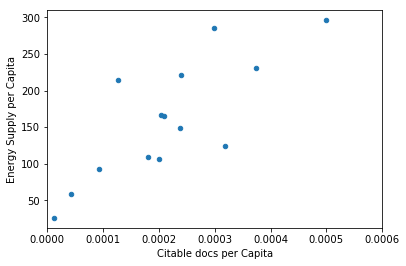

In [43]:
plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [44]:
median = Top15['% Renewable'].median()
median

17.15448

In [45]:
Top15['% Renewable'][1]

11.57098

In [46]:
#Top15['HighRenew'] = [1 if x >= median else 0 for x in Top15['% Renewable']]
#Top15['HighRenew']

In [47]:
Top15['HighRenew'] = None

In [48]:
for i in range(0,15):
    if Top15['% Renewable'][i] >= median:
        Top15['HighRenew'][i] = 1
    else:
        Top15['HighRenew'][i] = 0
        
Top15['HighRenew']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: object

In [49]:
def answer_ten():
    Top15 = answer_one()
    return "ANSWER"

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [50]:
ContinentDict = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
ContinentDict.values()

dict_values(['Asia', 'North America', 'Asia', 'Europe', 'Europe', 'North America', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Australia', 'South America'])

In [51]:
Top15['Continent'] = ContinentDict.values()
Top15_Continent = Top15.reset_index()
Top15_Continent

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2011,2012,2013,2014,2015,ratio,EstPOP,Citable docs per Capita,HighRenew,Continent
0,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1,Asia
1,United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0,North America
2,Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0,Asia
3,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0,Europe
4,Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1,Europe
5,Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,1,North America
6,Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,1,Europe
7,India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,0,Asia
8,France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,0,Europe
9,South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,...,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035,4.980543e+07,0.000239,0,Asia


In [52]:
(Top15_Continent.set_index('Continent')
 .groupby(level=0)['EstPOP'].agg({'size': np.size, 'sum': np.sum, 'mean': np.mean, 'std': np.std}))

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [54]:
def answer_eleven():
    Top15 = answer_one()
    return "ANSWER"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [59]:
Top15_Continent['bins'] = pd.cut(Top15_Continent['% Renewable'], 5)
Top15_Continent

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2012,2013,2014,2015,ratio,EstPOP,Citable docs per Capita,HighRenew,Continent,bins
0,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1,Asia,"(15.753, 29.227]"
1,United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0,North America,"(2.212, 15.753]"
2,Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0,Asia,"(2.212, 15.753]"
3,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0,Europe,"(2.212, 15.753]"
4,Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1,Europe,"(15.753, 29.227]"
5,Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,1,North America,"(56.174, 69.648]"
6,Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,1,Europe,"(15.753, 29.227]"
7,India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,0,Asia,"(2.212, 15.753]"
8,France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,0,Europe,"(15.753, 29.227]"
9,South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,...,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035,4.980543e+07,0.000239,0,Asia,"(2.212, 15.753]"


In [60]:
Top15_Continent.groupby(['Continent', 'bins']).size()

Continent      bins            
Asia           (2.212, 15.753]     3
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [61]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [63]:
Top15['EstPOP']

Country
China                 1.367645e+09
United States         3.176154e+08
Japan                 1.274094e+08
United Kingdom        6.387097e+07
Russian Federation    1.435000e+08
Canada                3.523986e+07
Germany               8.036970e+07
India                 1.276731e+09
France                6.383735e+07
South Korea           4.980543e+07
Italy                 5.990826e+07
Spain                 4.644340e+07
Iran                           NaN
Australia             2.331602e+07
Brazil                2.059153e+08
Name: EstPOP, dtype: float64

In [73]:
Top15['EstPOP'].apply(lambda x: '{:,}'.format(x))

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                                    nan
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: EstPOP, dtype: object

In [74]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [79]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = final_df
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


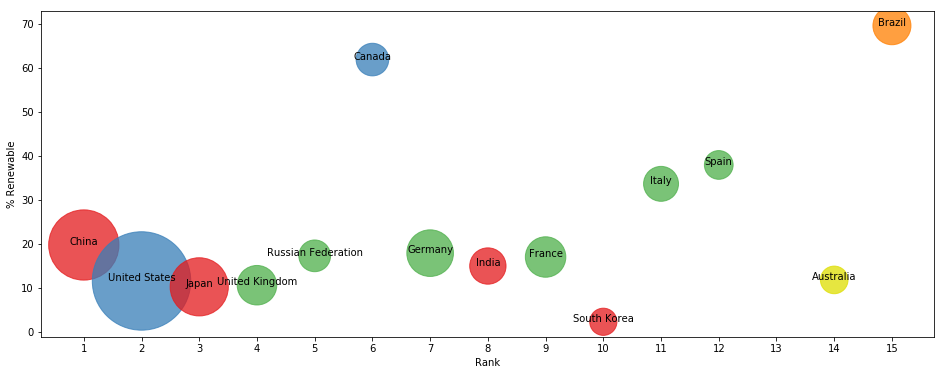

In [80]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!